In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

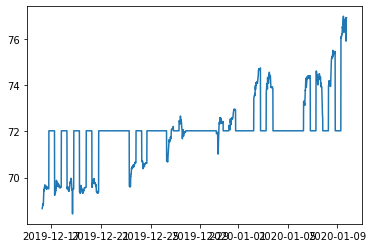

In [2]:
folder = os.listdir("C:/Users/natha/Downloads/S&Ptestabbrv/")
df = pd.read_csv("C:/Users/natha/Downloads/S&Ptestabbrv/" + folder[0] + "/" + "table_aapl.csv")
df = df.iloc[:,:7]
df.columns = ['Date','Time','Open','High','Low','Close','Volume']
for i in folder[1:]:
    df1 = pd.read_csv("C:/Users/natha/Downloads/S&Ptestabbrv/" + i + "/" + "table_aapl.csv")
    df1 = df1.iloc[:,:7]
    df1.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = pd.concat([df, df1], axis = 0, ignore_index = True)
a = df['Date'].astype(str) + df['Time'].astype(str)
df = df.drop("Time", axis= 1)
df['Date'] = a
df['Date'] = pd.to_datetime(df['Date'], format = "%Y%m%d%H%M")
df.rename(columns = {'Date':'Datetime'}, inplace = True)
df.set_index(df['Datetime'], inplace = True)
df = df.drop('Datetime', axis = 1)
df = df.resample('15min').mean()
df.fillna(value = df.mean(), inplace = True)
y = df.Close.values
x = df.index
fig, ax = plt.subplots()
ax.plot(x, y)
df.reset_index(inplace = True)

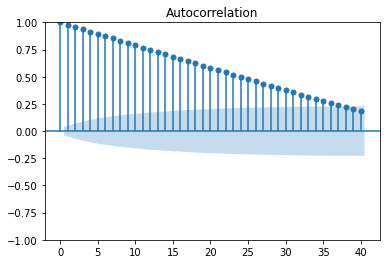

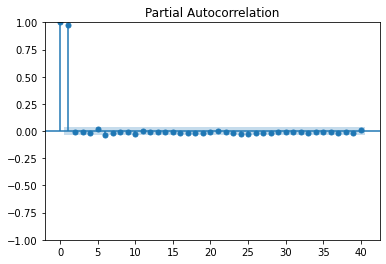

,Datetime,Open,High,Low,Close,Volume,Change
1,2019-12-16 07:15:00,68.710633,68.718100,68.704513,68.713460,4265.701467,0.054281
2,2019-12-16 07:30:00,68.719138,68.724677,68.713592,68.722192,2276.965008,0.008732
3,2019-12-16 07:45:00,68.749707,68.756167,68.745413,68.750713,3203.303127,0.028521
4,2019-12-16 08:00:00,68.793147,68.805653,68.773033,68.792233,25515.832860,0.041520
5,2019-12-16 08:15:00,68.832793,68.849027,68.816920,68.836773,19043.960000,0.044540
...,...,...,...,...,...,...,...
2343,2020-01-09 16:45:00,76.902747,76.907073,75.892807,75.899947,1218.925160,-1.017540
2344,2020-01-09 17:00:00,76.905427,76.910880,76.895500,76.907067,25413.264800,1.007120
2345,2020-01-09 17:15:00,76.912200,76.916180,76.902593,76.907553,5361.391193,0.000487
2346,2020-01-09 17:30:00,76.905893,76.912707,76.896620,76.909220,2319.718787,0.001667


In [3]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df.Close.values.squeeze(), lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(df.Close.values.squeeze(), lags=40, method="ywm")
plt.show()

df['Change'] = df.Close.diff(periods=1)
df = df[1:]
df

<AxesSubplot:>

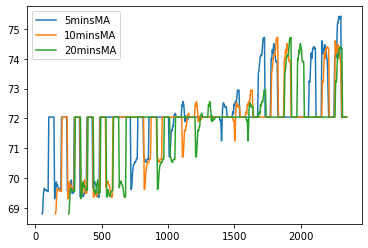

In [4]:
def moving_average(DataFrame, window_size):
  numbers = DataFrame.High
  i=0
  moving_averages = []
  while i < len(numbers) - window_size + 1:
      this_window = numbers[i : i + window_size]
      window_average = sum(this_window) / window_size
      moving_averages.append(window_average)
      i += 1
  return moving_averages

fiveMA = pd.Series(moving_average(df, 5), name="5minsMA")
tenMA = pd.Series(moving_average(df, 10), name="10minsMA")
twentyMA = pd.Series(moving_average(df, 20), name="20minsMA")
df = pd.concat([df, fiveMA, tenMA, twentyMA], axis=1)
df['5minsMA'] = df['5minsMA'].shift(50)
df['10minsMA'] = df['5minsMA'].shift(100)
df['20minsMA'] = df['5minsMA'].shift(200)
df = df[:-1]
df[['5minsMA','10minsMA','20minsMA']].plot()

In [5]:
lag_features = ["Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(value = df.mean(), inplace = True)
df

C:\Users\natha\AppData\Local\Temp\ipykernel_52036\929478299.py:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(value = df.mean(), inplace = True)


,Datetime,Open,High,Low,Close,Volume,Change,5minsMA,10minsMA,20minsMA,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
1,2019-12-16 07:15:00,68.710633,68.718100,68.704513,68.713460,4265.701467,0.054281,71.958793,71.888811,71.829599,68.713463,68.713463,68.713463,0.046403,0.097024,0.339267
2,2019-12-16 07:30:00,68.719138,68.724677,68.713592,68.722192,2276.965008,0.008732,71.958793,71.888811,71.829599,68.717827,68.717827,68.717827,0.006175,0.006175,0.006175
3,2019-12-16 07:45:00,68.749707,68.756167,68.745413,68.750713,3203.303127,0.028521,71.958793,71.888811,71.829599,68.728790,68.728790,68.728790,0.019483,0.019483,0.019483
4,2019-12-16 08:00:00,68.793147,68.805653,68.773033,68.792233,25515.832860,0.041520,71.958793,71.888811,71.829599,68.755043,68.744652,68.744652,0.035221,0.035488,0.035488
5,2019-12-16 08:15:00,68.832793,68.849027,68.816920,68.836773,19043.960000,0.044540,71.958793,71.888811,71.829599,68.793243,68.763077,68.763077,0.043039,0.051399,0.051399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2020-01-09 16:45:00,76.902747,76.907073,75.892807,75.899947,1218.925160,-1.017540,72.040681,72.040681,72.040681,76.568298,76.676750,76.674911,0.579006,0.356669,0.233434
2344,2020-01-09 17:00:00,76.905427,76.910880,76.895500,76.907067,25413.264800,1.007120,72.040681,72.040681,72.040681,76.574837,76.715202,76.689590,0.584492,0.366165,0.233728
2345,2020-01-09 17:15:00,76.912200,76.916180,76.902593,76.907553,5361.391193,0.000487,72.040681,72.040681,72.040681,76.571526,76.741684,76.702690,0.581602,0.373386,0.234597
2346,2020-01-09 17:30:00,76.905893,76.912707,76.896620,76.909220,2319.718787,0.001667,72.040681,72.040681,72.040681,76.907944,76.757767,76.717392,0.001129,0.378536,0.233208


In [6]:
def adfuller_test(price):
    result = sm.tsa.stattools.adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Close'])

ADF Test Statistic : -4.098967257452122
p-value : 0.0009723384187955038
#Lags Used : 0
Number of Observations Used : 2346
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [7]:
import pmdarima
df_train = df[df.Datetime < "2020-01-06 7:15:00"]
df_valid = df[df.Datetime >= "2020-01-06 7:15:00"]
features = ['Close_mean_lag3', 'Close_mean_lag7', 'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30']
np.any(np.isnan(df_train))
np.any(np.isnan(df_valid))
np.all(np.isfinite(df_train))
np.all(np.isfinite(df_valid))


model = pmdarima.auto_arima(df_train.Close, exogenous = df_train[features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous = df_train[features])

forecast = model.predict(n_periods=len(df_valid), exogenous = df_valid[features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2251.303, Time=4.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1258.289, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1315.416, Time=2.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1929.397, Time=3.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1260.277, Time=1.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2239.209, Time=4.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2333.344, Time=4.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2033.313, Time=3.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1673.909, Time=2.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2314.992, Time=4.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1752.165, Time=2.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2323.647, Time=4.73 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=3.74 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 43.066 seconds


C:\Users\natha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\natha\AppData\Local\Temp\ipykernel_52036\3628191902.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_ARIMAX"] = forecast


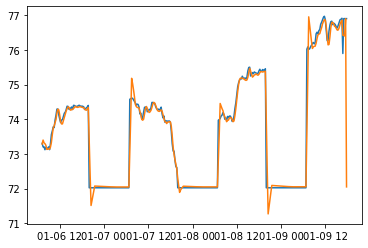

RMSE of Auto ARIMAX: 0.3771498617272038
MAE of Auto ARIMAX: 0.12904417228411336


,Datetime,Open,High,Low,Close,Volume,Change,5minsMA,10minsMA,20minsMA,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
1,2019-12-16 07:15:00,68.710633,68.718100,68.704513,68.713460,4265.701467,0.054281,71.958793,71.888811,71.829599,68.713463,68.713463,68.713463,0.046403,0.097024,0.339267
2,2019-12-16 07:30:00,68.719138,68.724677,68.713592,68.722192,2276.965008,0.008732,71.958793,71.888811,71.829599,68.717827,68.717827,68.717827,0.006175,0.006175,0.006175
3,2019-12-16 07:45:00,68.749707,68.756167,68.745413,68.750713,3203.303127,0.028521,71.958793,71.888811,71.829599,68.728790,68.728790,68.728790,0.019483,0.019483,0.019483
4,2019-12-16 08:00:00,68.793147,68.805653,68.773033,68.792233,25515.832860,0.041520,71.958793,71.888811,71.829599,68.755043,68.744652,68.744652,0.035221,0.035488,0.035488
5,2019-12-16 08:15:00,68.832793,68.849027,68.816920,68.836773,19043.960000,0.044540,71.958793,71.888811,71.829599,68.793243,68.763077,68.763077,0.043039,0.051399,0.051399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2020-01-09 16:45:00,76.902747,76.907073,75.892807,75.899947,1218.925160,-1.017540,72.040681,72.040681,72.040681,76.568298,76.676750,76.674911,0.579006,0.356669,0.233434
2344,2020-01-09 17:00:00,76.905427,76.910880,76.895500,76.907067,25413.264800,1.007120,72.040681,72.040681,72.040681,76.574837,76.715202,76.689590,0.584492,0.366165,0.233728
2345,2020-01-09 17:15:00,76.912200,76.916180,76.902593,76.907553,5361.391193,0.000487,72.040681,72.040681,72.040681,76.571526,76.741684,76.702690,0.581602,0.373386,0.234597
2346,2020-01-09 17:30:00,76.905893,76.912707,76.896620,76.909220,2319.718787,0.001667,72.040681,72.040681,72.040681,76.907944,76.757767,76.717392,0.001129,0.378536,0.233208


In [12]:
x = df_valid['Datetime']
real = df_valid["Close"]
predict = df_valid["Forecast_ARIMAX"]

plt.plot(x, real, label = "Close")
plt.plot(x, predict, label = "Forecast_ARIMAX")
plt.show()

import sklearn.metrics
print("RMSE of Auto ARIMAX:", np.sqrt(sklearn.metrics.mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX:", sklearn.metrics.mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))